## load data

In [0]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
len(train_data[1])

189

In [0]:
train_labels


array([1, 0, 0, ..., 0, 1, 0])

In [0]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [0]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

In [0]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[3]])

In [0]:
print(decoded_review)
print(len(train_data[0]))

? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prota

## We need to vectorize the data

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

## Vectorize Trainset and Testset

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build your network

In [0]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.6113 - acc: 0.6654 - val_loss: 0.4959 - val_acc: 0.8071
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.4886 - acc: 0.7755 - val_loss: 0.3868 - val_acc: 0.8756
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.4065 - acc: 0.8363 - val_loss: 0.3383 - val_acc: 0.8720
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.3479 - acc: 0.8656 - val_loss: 0.2954 - val_acc: 0.8892
Epoch 5/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.3077 - acc: 0.8909 - val_loss: 0.2799 - val_acc: 0.8898
Epoch 6/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2702 - acc: 0.9045 - val_loss: 0.2741 - val_acc: 0.8919
Epoch 7/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2399 - acc: 0.9204 - val_loss: 0.2743 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


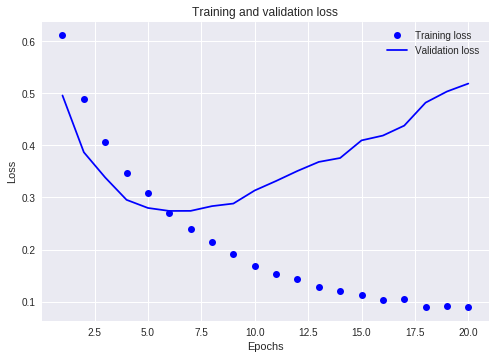

In [0]:
history_dict = history.history
print(history_dict.keys())
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()